# Borrowers of Prosper Loan
## by Khadija Mahmoud

## Investigation Overview

> we investigating deeply in loan data frame features in arder to make a overview on the loans type, duration, payment quantity and construct relationships between these features and the borrowers

## Dataset Overview

> we are working on prosper loan data set and subsitting it to dataset of interest to focus on specific features,
after that we got a dataset of +110K records and about 17 features

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe and subset dataframe of interest
df=pd.read_csv("prosperLoanData.csv")
prosper=df[['Investors','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','PercentFunded','TotalTrades','IncomeRange','StatedMonthlyIncome','CurrentlyInGroup','IsBorrowerHomeowner','Occupation','EmploymentStatus','ListingCategory (numeric)','BorrowerRate','BorrowerAPR','LoanStatus','Term']]
#drop missing values
prosper.dropna(inplace=True)

### Who are prosper borrowers?
#### They are commonly employed or have a full time job.

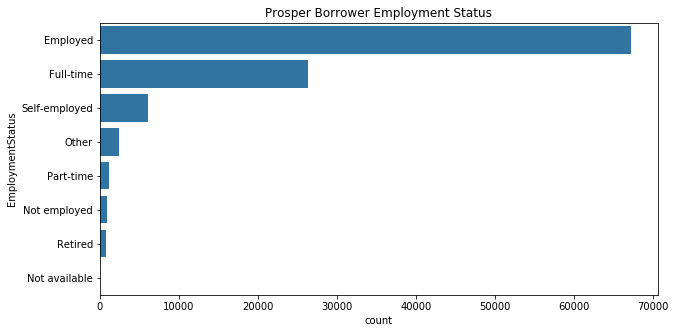

In [4]:
# barplot for employment status
plt.figure(figsize=(10,5));

sb.countplot(data = prosper, y='EmploymentStatus',color=sb.color_palette()[0],order=prosper['EmploymentStatus'].value_counts().index);
plt.title('Prosper Borrower Employment Status');

### What is borrowers income range?
#### They have frequent income range of 25K-50K and 50K-75K.


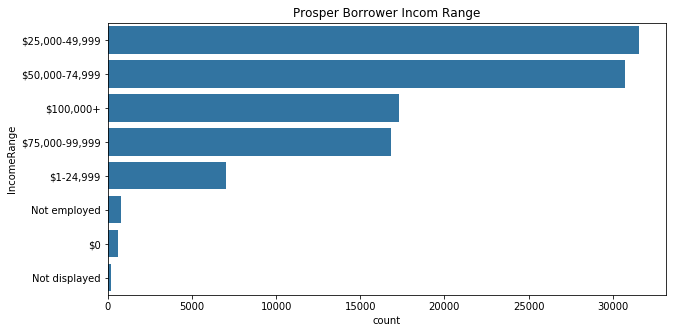

In [3]:
#distribution using Seaborn bar plot 
plt.figure(figsize=(10,5));
sb.countplot(data = prosper, y='IncomeRange',color=sb.color_palette()[0]);
plt.title('Prosper Borrower Incom Range');

### How long is prosper loan in months?
#### There are 3 options 36 which is frequent, 60 and 12 months.

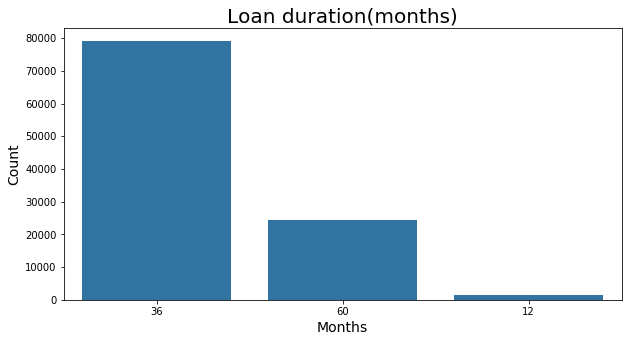

In [5]:
# make function to be called whenever needed to change the labels
def custom_labels(x_label,y_label,title):
    plt.title(title,fontsize=20)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
# barplot for loan duration
plt.figure(figsize=(10,5));
sb.countplot(data = prosper, x='Term',color=sb.color_palette()[0],order=prosper['Term'].value_counts().index);
#manage labels
custom_labels('Months','Count','Loan duration(months)')


### How much is loan payment the borrowers pay?
#### The most frequent monthly payment is 100-500 $

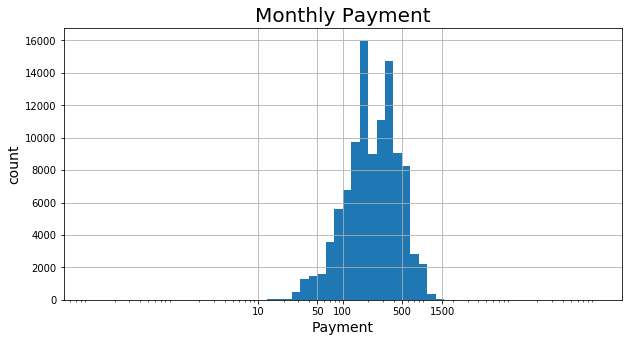

In [6]:
# apply logarithmics transformation
plt.figure(figsize=(10,5));
bins= 10**np.arange(-1,5+0.1,0.1)
ticks=[10,50,100,500,1500]
labels=['{}'.format(v) for v in ticks]
prosper['MonthlyLoanPayment'].hist(bins=bins);

#manage labels
custom_labels('Payment',
'count','Monthly Payment')


plt.xscale('log')
plt.xticks(ticks,labels);

### How does loan original amount affect loan monthly payment?
#### loan monthly payment increases when the loan original amount increaes.


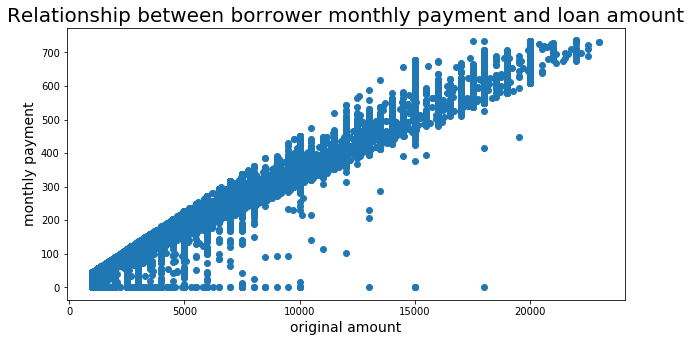

In [12]:
# remove outlier
Q1 = prosper.quantile(0.25)
Q3 = prosper.quantile(0.75)
IQR = Q3 - Q1
prosper_copy= prosper[~((prosper < (Q1 - 1.5 * IQR)) |(prosper > (Q3 + 1.5 * IQR))).any(axis=1)]
#scatter plot between borrower monthly payment and loan amount 
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='LoanOriginalAmount',y='MonthlyLoanPayment');
#manage labels
custom_labels('original amount',
'monthly payment','Relationship between borrower monthly payment and loan amount')



### a) How being a home owner borrower affects loan status?
#### If the borrower was a home owner, it's more likely to have current loans more than not home owner borrowers.

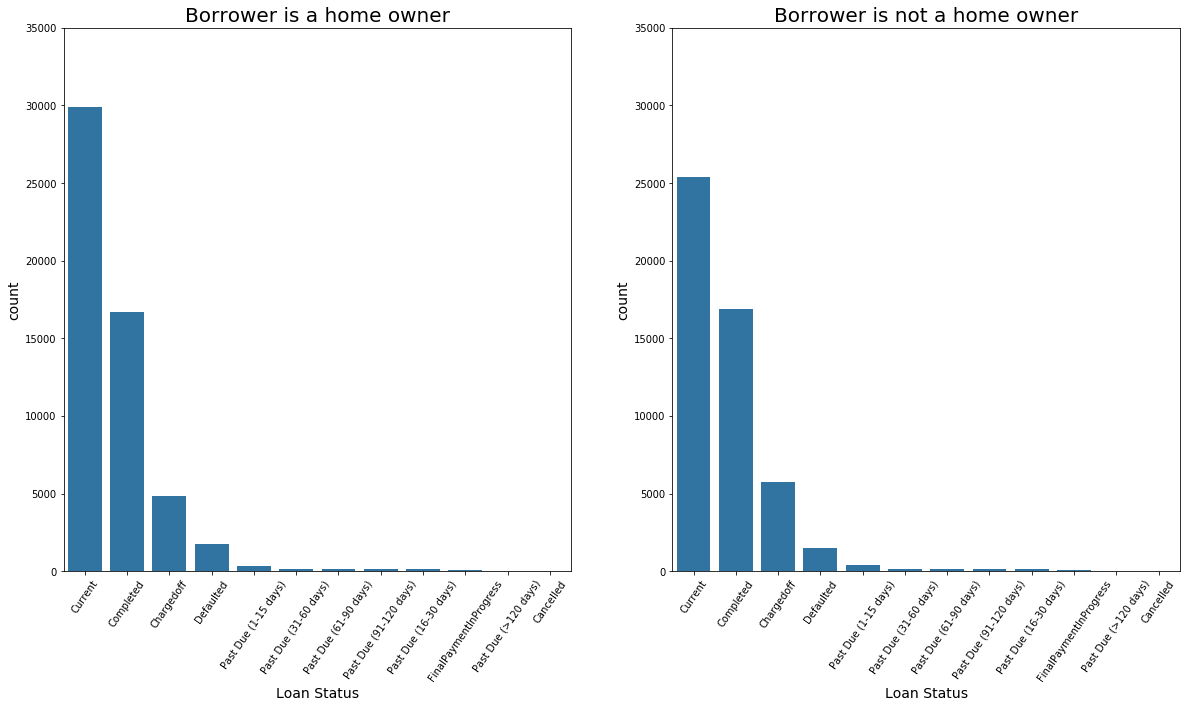

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
fig1=sb.countplot(x='LoanStatus',data=prosper[prosper['IsBorrowerHomeowner']==True],color=sb.color_palette()[0],
                 order=prosper['LoanStatus'].value_counts().index)
custom_labels('Loan Status','count','Borrower is a home owner')
plt.xticks(rotation=55)
plt.ylim([0,35000])

plt.subplot(1,2,2)
fig2=sb.countplot (x='LoanStatus',data=prosper[prosper['IsBorrowerHomeowner']==False],color=sb.color_palette()[0],
                  order=prosper['LoanStatus'].value_counts().index)
custom_labels('Loan Status','count','Borrower is not a home owner')
plt.xticks(rotation=55)

plt.ylim([0,35000])

plt.show()

### b) How much monthly payment varies according to borrower employment status and loan amount ? 
####  Payment is increasing according to loan amount and borrower employment status has almost no effect on it.
#### Borrowers with not indicated employment status are not assigned to loan amount above 25K.
#### Borrowers assigned to loan amount above 25K who are employed.


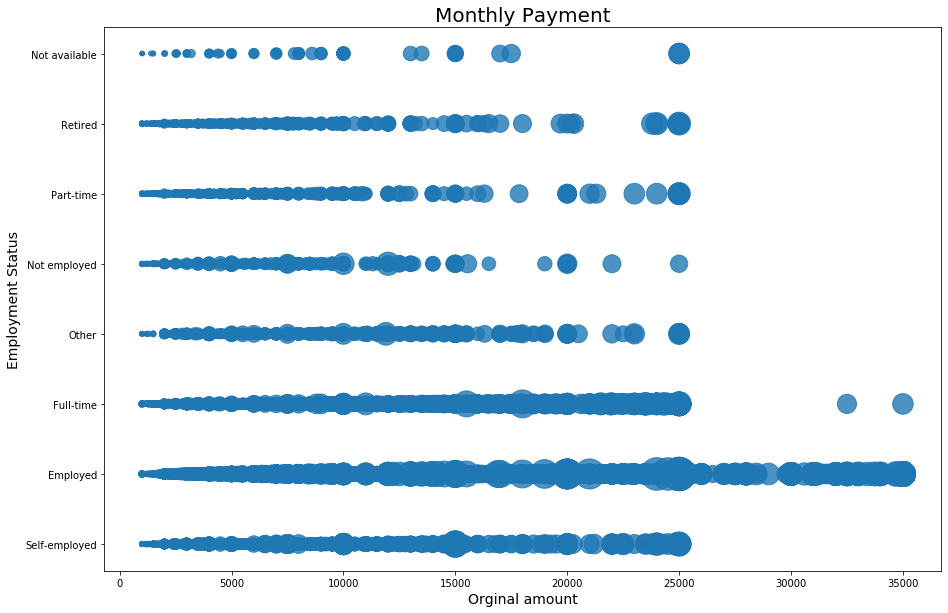

In [9]:
# regplotting
plt.figure(figsize=(15,10))
# prepare plottig to be approperaite to screen
sb.regplot(data=prosper,x='LoanOriginalAmount',y='EmploymentStatus',fit_reg=False,
              scatter_kws={'s':prosper['MonthlyLoanPayment']/2});
# manage labels
custom_labels('Orginal amount','Employment Status' ,'Monthly Payment')